In [14]:
import numpy as np                   
import pandas as pd                  
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
import seaborn as sns 

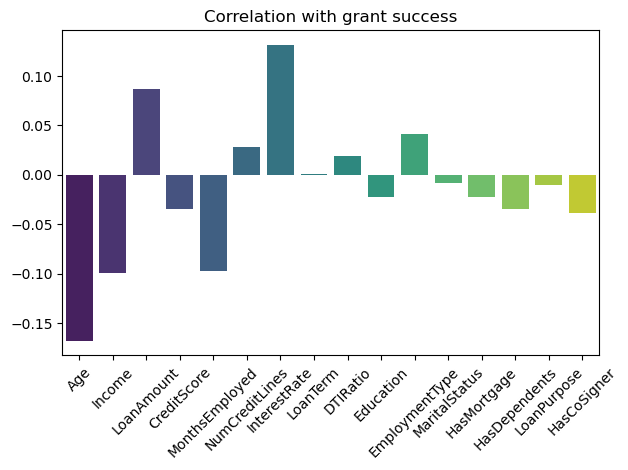

In [4]:
data = pd.read_csv('project.csv')
#processing string data
encoder = LabelEncoder()
cols = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in cols:
    data[col] = encoder.fit_transform(data[col])

#correlation analysis
data_corr = data.drop(['LoanID','Default'],axis=1)
correlation = data_corr.corrwith(data['Default'])
sns.barplot(x=correlation.index, y=correlation.values, palette='viridis')
plt.title('Correlation with grant success')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
#data cleaning and selecting features
data = data.drop(['LoanID','MonthsEmployed','NumCreditLines','InterestRate','LoanTerm','Education','MaritalStatus','HasDependents','HasCoSigner'],axis=1)
data = data.dropna(axis=0)

data.sample(5)

,Age,Income,LoanAmount,CreditScore,DTIRatio,EmploymentType,HasMortgage,LoanPurpose,Default
121726,40,118108,237539,822,0.69,1,0,1,0
100317,51,44672,221417,835,0.17,2,0,1,0
37427,24,146293,50771,670,0.53,1,0,3,0
228028,59,40346,214504,520,0.25,0,0,1,0
31228,44,36508,211551,318,0.36,1,1,2,1


In [6]:
X = data.drop(['Default'],axis=1)
y = data['Default'] #label if a loan is automatically granted or not

In [7]:
#splitting into training and testing
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

In [9]:
model1 = LinearRegression()
#training
model1.fit(X_train, y_train)
y_train_pred = model1.predict(X_train)
error_train = mean_squared_error(y_train, y_train_pred)

#validation
model1.fit(X_val, y_val)
y_val_pred = model1.predict(X_val)
error_val = mean_squared_error(y_val, y_val_pred)

In [10]:
print("Linear Regression result: ")
print("Error for training: ",error_train)
print("Error for validation: ",error_val)

Linear Regression result: 
Error for training:  0.09769559803148782
Error for validation:  0.09703935046647708


In [11]:
model2 = RandomForestClassifier()
#training
model2.fit(X_train, y_train)
y_train_pred = model2.predict(X_train)
error_train = mean_squared_error(y_train, y_train_pred)

#validation
model2.fit(X_val, y_val)
y_val_pred = model2.predict(X_val)
error_val = mean_squared_error(y_val, y_val_pred)

In [12]:
print("Random Forest Classifier result: ")
print("Error for training: ",error_train)
print("Error for validation: ",error_val)

Random Forest Classifier result: 
Error for training:  5.384845087797451e-05
Error for validation:  0.00011748580379870765


In [13]:
#testing
y_pred_test = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_test)
error_test = mean_squared_error(y_test, y_pred_test)
print("Accuracy: ", accuracy)

Accuracy:  0.8842764832582729


[Text(0, 0.5, 'zero'), Text(0, 1.5, 'one')]

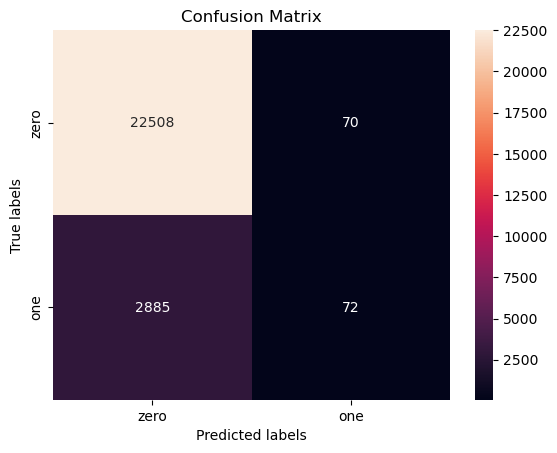

In [16]:
#confusion matrix
conf_mat = confusion_matrix(y_test, y_pred_test)
ax= plt.subplot()

sns.heatmap(conf_mat, annot=True, fmt='g', ax=ax)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['zero', 'one'])
ax.yaxis.set_ticklabels(['zero', 'one'])